# **Data Visualization**

## Objectives
* Read the cleaned data and visualize it in order to understand trends, correlations, and to understand which variables influence price.

## Inputs
* The file uses `CarPrice_cleaned.csv` located in `data\cleaned` folder.

## Outputs
* This notebook generates various plots and relies on `matplotlib`, `seaborn` and `plotly` to generate them

## Load the libraries and the data
In this section relevant data analysis libraries and the raw data will be loaded.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

The data will be loaded as the variable `df`:

In [3]:
df = pd.read_csv("../data/cleaned/CarPrice_cleaned.csv")
print(df.shape)
df.head()

(205, 27)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,injection,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,injection,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,injection,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,injection,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,injection,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Overview of the price data distribution
This section will provide a brief overview of the price distribution. Let's first look at the summary statistics for price:

In [4]:
df['price'].describe().round(1)

count      205.0
mean     13276.7
std       7988.9
min       5118.0
25%       7788.0
50%      10295.0
75%      16503.0
max      45400.0
Name: price, dtype: float64

This data will be easier to visualize when presented as a box plot and a swarm plot:

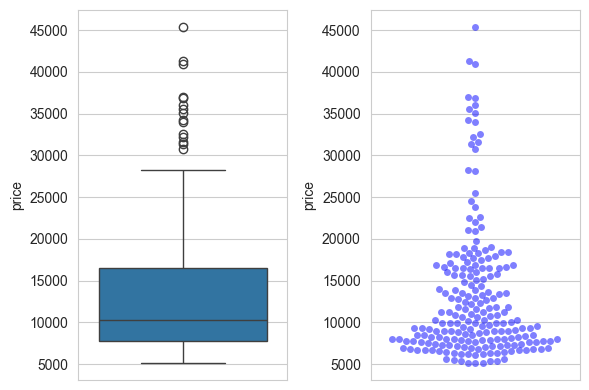

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 4))
sns.boxplot(y='price', data=df, ax=ax[0])
sns.swarmplot(y='price', data=df, ax=ax[1], color='blue', alpha=0.5)
plt.tight_layout()
plt.show()

Here we can clearly see that the majority of car prices are concentrated at the lower end of the price range, with a significant number of outliers in the higher price range. These are likely more premium car models.

Next we will take a closer look at the price distribution with the kde plot overlayed over the histogram:

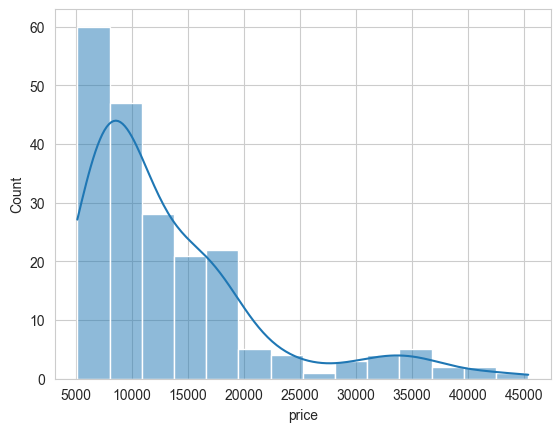

In [6]:
sns.histplot(data=df, x='price', kde=True)
plt.show()

Here we can see that the data shows a kind of mix between right skewed and bimodal data, with the second mode having clearly less objects. As expected most of the prices are concentrated in $5,000 - $20,000 range, with some significant outliers.

## Categorical variables and average price

### Analysis of Technical and Mechanical Categorical Variables


In [ ]:
# Import the necessary Plotly modules: graph_objects for creating plots, and make_subplots for arranging multiple plots in a grid.
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of variables to plot
cat_vars = ['fueltype', 'aspiration', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

# Create subplot grid: 2 rows, 3 columns
fig = make_subplots(rows=2, cols=3, subplot_titles=cat_vars)

# Loop through each categorical variable, calculate average price, and add a bar plot to the corresponding subplot
for i, var in enumerate(cat_vars):
    avg_price = df.groupby(var)['price'].mean().sort_values()
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(
        go.Bar(x=avg_price.index, y=avg_price.values, name=var),
        row=row, col=col
    )

fig.update_layout(
    height=600, width=1000,
    title_text="Average Car Price by Technical and Mechanical Features",
    showlegend=False
)
fig.show()

### Car body and average price
There is an assumption that the body type of a car will have a significant influence on its price:

In [10]:
carbody = df.groupby('carbody').agg(count=('carbody', 'size'), avg_price=('price', 'mean')).reset_index()
carbody

,carbody,count,avg_price
0,convertible,6,21890.500000
1,hardtop,8,22208.500000
2,hatchback,70,10376.652386
3,sedan,96,14344.270833
4,wagon,25,12371.960000


### Car brand and average price
Here we will construct a DataFrame that groups different car models by brand and averages their prices:

In [8]:
brand = df.groupby('brand').agg(count=('brand', 'size'), avg_price=('price', 'mean')).reset_index()
brand

,brand,count,avg_price
0,alfa-romero,3,15498.333333
1,audi,7,17859.166714
2,bmw,8,26118.750000
3,buick,8,33647.000000
4,chevrolet,3,6007.000000
5,dodge,9,7875.444444
6,honda,13,8184.692308
7,isuzu,4,8916.500000
8,jaguar,3,34600.000000
9,mazda,17,10652.882353


Here is the summary of this data in a bar chart:

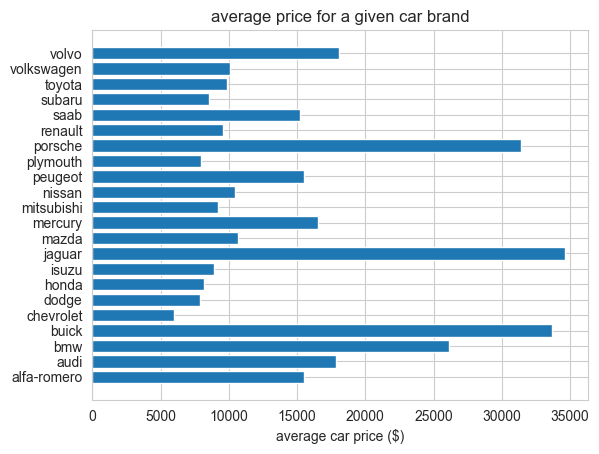

In [9]:
plt.barh(y=brand['brand'], width=brand['avg_price'])
plt.xlabel("average car price ($)")
plt.title("average price for a given car brand")
plt.grid(True) 
plt.show()

We can clearly see that some brands (Porche, Jaguar and Buick) stand out due to their luxury status. We can however see another outlier, BMW. It would be a good idea to look at their marketing strategy and their product repertoire to see what stands out in these 4 brands.